In [105]:
from __future__ import print_function, division
import sys
import os
import numpy 
import pylab as pl
import pandas as pd
import statsmodels.api as sm


import json
import os
s = json.load( open(os.getenv('PUI2016')+"/fbb_matplotlibrc.json") )
#s = json.load(open('/Users/jonathanatoy/Documents/PUI2016_fb55/fbb_matplotlibrc.json'))
pl.rcParams.update(s)



%pylab inline

Populating the interactive namespace from numpy and matplotlib


//anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
//anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
`%matplotlib` prevents importing * from pylab and numpy


In [108]:
kelly_colors_hex = [
    '#FFB300', # Vivid Yellow
    '#803E75', # Strong Purple
    '#FF6800', # Vivid Orange
    '#A6BDD7', # Very Light Blue
    '#C10020', # Vivid Red
    '#CEA262', # Grayish Yellow
    '#817066', # Medium Gray
    '#007D34', # Vivid Green
    '#F6768E', # Strong Purplish Pink
    '#00538A', # Strong Blue
    '#FF7A5C', # Strong Yellowish Pink
    '#53377A', # Strong Violet
    '#FF8E00', # Vivid Orange Yellow
    '#B32851', # Strong Purplish Red
    '#F4C800', # Vivid Greenish Yellow
    '#7F180D', # Strong Reddish Brown
    '#93AA00', # Vivid Yellowish Green
    '#593315', # Deep Yellowish Brown
    '#F13A13', # Vivid Reddish Orange
    '#232C16', # Dark Olive Green
    ]

newparams = {
  "lines.linewidth": 2.0,
  "axes.edgecolor": "#aaaaaa",
  "patch.linewidth": 1.0,
  "legend.fancybox": 'false',
  "axes.color_cycle": kelly_colors_hex,
  "axes.facecolor": "#ffffff",
  "axes.labelsize": "large",
  "axes.grid": 'false',
  "patch.edgecolor": "#555555",
  "axes.titlesize": "x-large",
  "svg.embed_char_paths": "path",
}
pl.rcParams.update(newparams)

//anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
//anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [143]:
#data downloaded from http://oceanadapt.rutgers.edu/download/
df = pd.read_csv('/Users/jonathanatoy/Documents/PUIdata/Data_Vis_2016_10_24.csv')
df = df.dropna()
df.head(97)

,Year,Region,Species,Latitude,Latitude_std_err,Longitude,Longitude_std_err,Depth,Depth_std_err
0,1967,Northeast US Fall,ALL,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1968,Northeast US Fall,ALL,0.176037,0.127496,0.188498,0.236476,2.809337,2.980820
2,1969,Northeast US Fall,ALL,0.239861,0.141568,0.251617,0.187791,-2.108548,2.998759
3,1970,Northeast US Fall,ALL,0.334524,0.110001,0.548125,0.150758,5.706897,3.536085
4,1971,Northeast US Fall,ALL,0.240048,0.164327,0.282791,0.242001,-0.992367,4.383354
5,1972,Northeast US Fall,ALL,0.395743,0.137094,0.539956,0.254420,6.709534,3.946988
6,1973,Northeast US Fall,ALL,0.459813,0.133348,0.566070,0.163473,9.028930,3.837248
7,1974,Northeast US Fall,ALL,0.554868,0.153620,0.791390,0.248808,4.234393,4.718418
8,1975,Northeast US Fall,ALL,0.630233,0.137616,0.958436,0.196065,6.886519,4.173645
9,1976,Northeast US Fall,ALL,0.455489,0.122628,0.740151,0.198121,5.410061,3.867261


In [128]:
df.Year = pd.to_numeric(df.Year)
fall = df.Year[0:49]
spring = df.Year[49:97]

In [129]:
Fall = pd.DataFrame()
Fall['Year'] = fall
Fall['Depth'] = df.Depth[0:49]
#Fall

Spring = pd.DataFrame()
Spring['Year'] = spring
Spring['Depth'] = df.Depth[49:97]
#Spring

In [130]:
#Fit Fall Data 
X = sm.add_constant(fall)
fallmodel = sm.OLS(df.Depth[0:49], X).fit() 
fall_pred = pd.Series(fallmodel.predict(X)) 

#Fit Spring Data
X = sm.add_constant(spring)
springmodel = sm.OLS(df.Depth[49:97], X).fit() 
spring_pred = pd.Series(springmodel.predict(X)) 

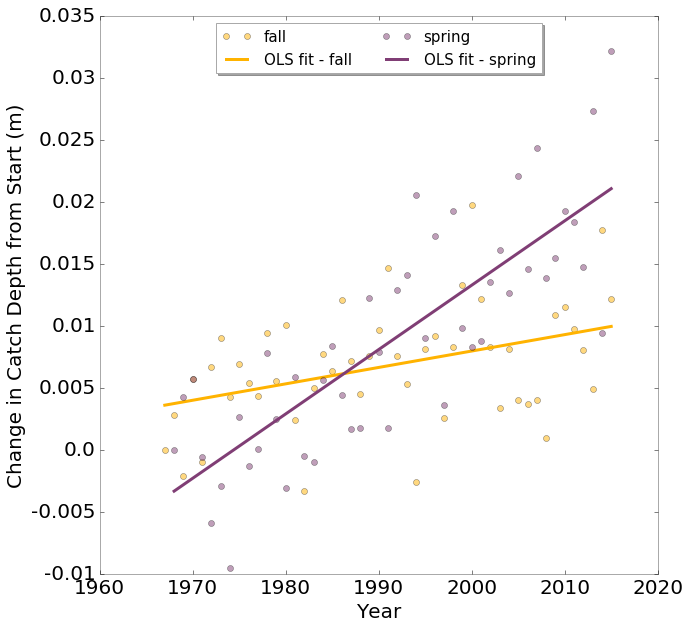

In [148]:
ax = pl.figure(figsize=(10,10)).add_subplot(111)
ax.plot(fall,df.Depth[0:49], 'o', label='fall', color='#FFB300', alpha = 0.5)
ax.plot(fall,fall_pred, label='OLS fit - fall', lw = 3,color='#FFB300')
ax.plot(spring,df.Depth[49:97], 'o', label='spring', color='#803E75', alpha = 0.5)
ax.plot(spring,spring_pred, label='OLS fit - spring', lw = 3, color='#803E75')

for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(20)
[tick.label.set_fontsize(20) for tick in ax.yaxis.get_major_ticks()]

ax.set_yticklabels([ "%s"%(f/1000) for f in ax.get_yticks()], fontsize=20)
pl.xlabel("Year", fontsize=20)
pl.ylabel("Change in Catch Depth from Start (m)", fontsize=20)
axlegend = pl.legend(loc=9, shadow=True, ncol = 2, prop = {'size':15})

### Figure 1: Change in average catch depth for all species of fish in the USA Northeast over time broken down by season. The catch depth is increasing at a significantly faster rate during spring, possibly indicating increased sensitivity to rising ocean temperatures during that season.